<a href="https://colab.research.google.com/github/blueCormorant/MCTest-Augmented-/blob/master/Join_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy_conll
!pip install spacy-stanza
!pip install spacy-udpipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=9f5de786ee674eb9e07ee7ceba6dd56795af07075414d5a6078529fff6fe1249
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.5/848.5 KB 12.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import spacy_conll
import spacy
from spacy_conll import init_parser
from tqdm import tqdm

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [77]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
dir_path = "drive/MyDrive/Thesis/"
context_file = "prompt_complexity_dataset.tsv"
Q1_file = "prompt_complexity_Q1.tsv"
Q2_file = "prompt_complexity_Q2.tsv"
Q3_file = "prompt_complexity_Q3.tsv"
Q4_file = "prompt_complexity_Q4.tsv"

In [13]:
with open(f"{dir_path}{context_file}", "r") as infile:
    contexts = pd.read_csv(infile, sep="\t").drop(columns = ["Unnamed: 0"])

In [18]:
with open(f"{dir_path}{Q1_file}", "r") as infile:
    Q1 = pd.read_csv(infile, sep="\t").drop(columns = ["Unnamed: 0"])

with open(f"{dir_path}{Q2_file}", "r") as infile:
    Q2 = pd.read_csv(infile, sep="\t").drop(columns = ["Unnamed: 0"])

with open(f"{dir_path}{Q3_file}", "r") as infile:
    Q3 = pd.read_csv(infile, sep="\t").drop(columns = ["Unnamed: 0"])

with open(f"{dir_path}{Q4_file}", "r") as infile:
    Q4 = pd.read_csv(infile, sep="\t").drop(columns = ["Unnamed: 0"])

In [23]:
questions = [Q1, Q2, Q3, Q4]

In [73]:
def join_datasets(contexts, question_sets):
    joined_dfs = [pd.DataFrame(columns = ["item", "complexity_score", "char_len", "score_over_len", "prompt"]) for _ in range(1,5)]
    for df, questions in zip(joined_dfs, question_sets):
        df["item"] = contexts.index.to_series()
        df["complexity_score"] = contexts["complexity_score"] + questions["complexity_score"]
        df["char_len"] = contexts["char_len"] + questions["char_len"]
        df["score_over_len"] = df["complexity_score"] / df["char_len"]
        df["prompt"] = contexts["context"] + questions["question"]
    new_index = pd.Index(range(len(contexts)*len(question_sets)))
    return pd.concat(joined_dfs).sort_values(by=['item']).set_index(new_index)

In [75]:
joined_dataset = join_datasets(contexts, questions)

In [76]:
joined_dataset

,item,complexity_score,char_len,score_over_len,prompt
0,0,52,925,0.056216,Alyssa got to the beach after a long trip. She...
1,0,54,936,0.057692,Alyssa got to the beach after a long trip. She...
2,0,53,929,0.057051,Alyssa got to the beach after a long trip. She...
3,0,52,940,0.055319,Alyssa got to the beach after a long trip. She...
4,1,67,898,0.074610,"One morning, Elena woke up, much like she did ..."
...,...,...,...,...,...
1195,298,88,1162,0.075731,Once there was a boy named Bill who liked to p...
1196,299,76,1375,0.055273,This summer Frank and his friends went to Boy ...
1197,299,73,1328,0.054970,This summer Frank and his friends went to Boy ...
1198,299,78,1393,0.055994,This summer Frank and his friends went to Boy ...


In [83]:
joined_dataset.drop(columns=["item"]).describe()

,complexity_score,char_len,score_over_len
count,1200.000000,1200.000000,1200.000000
mean,75.874167,1140.020000,0.066309
std,23.239192,309.709465,0.007469
min,29.000000,613.000000,0.043011
25%,59.000000,911.750000,0.061236
50%,70.000000,1068.500000,0.066585
75%,89.000000,1326.500000,0.070905
max,203.000000,3093.000000,0.088136


(array([  4.,  13.,  35.,  74., 119., 184., 147., 106., 112.,  80.,  65.,
         64.,  50.,  40.,  38.,  25.,  14.,  15.,   3.,   4.,   0.,   0.,
          0.,   0.,   0.,   4.,   0.,   0.,   0.,   4.]),
 array([ 29. ,  34.8,  40.6,  46.4,  52.2,  58. ,  63.8,  69.6,  75.4,
         81.2,  87. ,  92.8,  98.6, 104.4, 110.2, 116. , 121.8, 127.6,
        133.4, 139.2, 145. , 150.8, 156.6, 162.4, 168.2, 174. , 179.8,
        185.6, 191.4, 197.2, 203. ]),
 <a list of 30 Patch objects>)

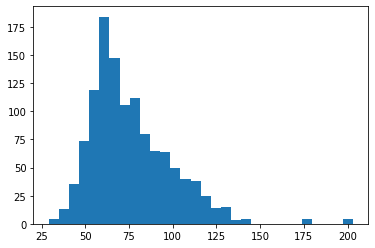

In [79]:
counts, bins = np.histogram(joined_dataset["complexity_score"], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

(array([ 24.,  23., 122., 217., 164., 112.,  84.,  96.,  81.,  90.,  67.,
         28.,  36.,  26.,   9.,   9.,   0.,   4.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   4.]),
 array([ 613.        ,  695.66666667,  778.33333333,  861.        ,
         943.66666667, 1026.33333333, 1109.        , 1191.66666667,
        1274.33333333, 1357.        , 1439.66666667, 1522.33333333,
        1605.        , 1687.66666667, 1770.33333333, 1853.        ,
        1935.66666667, 2018.33333333, 2101.        , 2183.66666667,
        2266.33333333, 2349.        , 2431.66666667, 2514.33333333,
        2597.        , 2679.66666667, 2762.33333333, 2845.        ,
        2927.66666667, 3010.33333333, 3093.        ]),
 <a list of 30 Patch objects>)

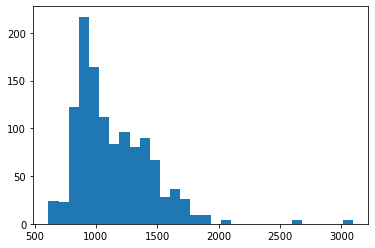

In [80]:
counts, bins = np.histogram(joined_dataset["char_len"], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

(array([  8.,   2.,   4.,   8.,   6.,  10.,  15.,  13.,  32.,  55.,  58.,
         78.,  75.,  81.,  90.,  96., 111.,  99.,  95.,  57.,  50.,  56.,
         32.,  18.,  17.,  11.,   3.,   5.,  10.,   5.]),
 array([0.04301075, 0.04451491, 0.04601908, 0.04752324, 0.0490274 ,
        0.05053156, 0.05203572, 0.05353988, 0.05504404, 0.0565482 ,
        0.05805237, 0.05955653, 0.06106069, 0.06256485, 0.06406901,
        0.06557317, 0.06707733, 0.0685815 , 0.07008566, 0.07158982,
        0.07309398, 0.07459814, 0.0761023 , 0.07760646, 0.07911063,
        0.08061479, 0.08211895, 0.08362311, 0.08512727, 0.08663143,
        0.08813559]),
 <a list of 30 Patch objects>)

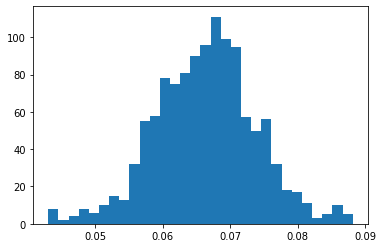

In [81]:
counts, bins = np.histogram(joined_dataset["score_over_len"], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

In [84]:
joined_dataset.to_csv(f"{dir_path}1200_prompts_dataset.tsv", sep="\t")